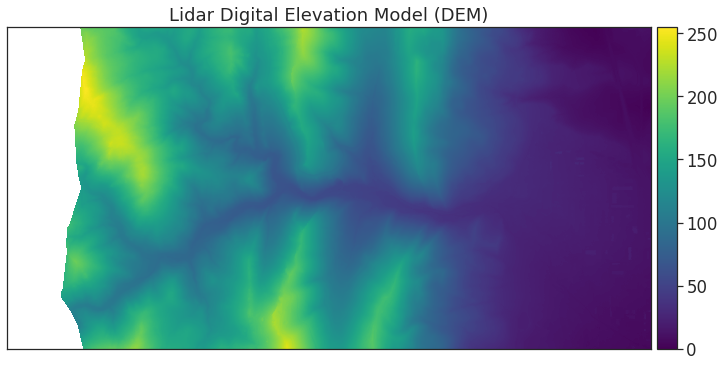

In [133]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from rasterio.plot import show_hist
from shapely.geometry import Polygon, mapping, box
from rasterio.mask import mask
# a package created for this class that will be discussed later in this lesson
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
lidar_dem = rio.open(
    '/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')
lidar_dem_im = lidar_dem.read(masked=True)

ep.plot_bands(lidar_dem_im[0], cmap='viridis',
              title='Lidar Digital Elevation Model (DEM)')
plt.show()



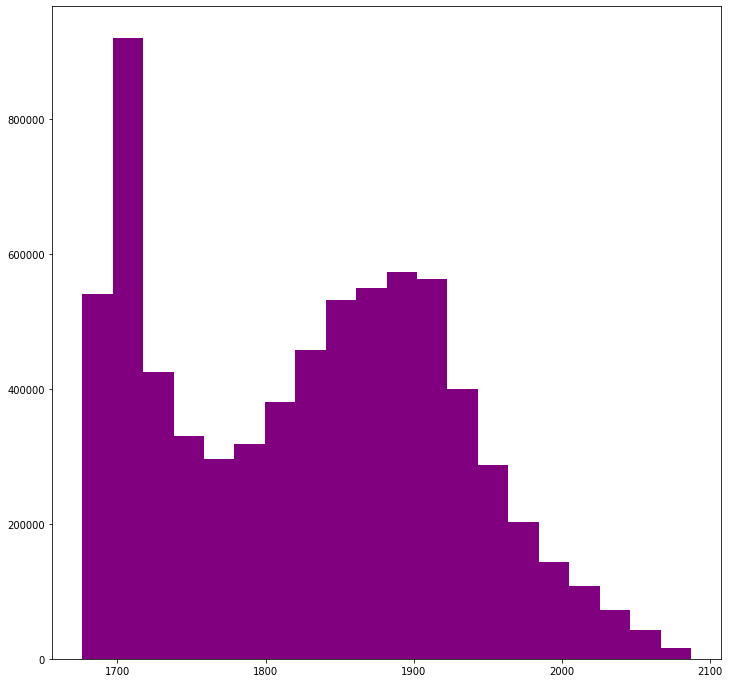

In [5]:
ep.hist(lidar_dem_im)
plt.show()

In [11]:
sjer_dtm_path = "/home/marta/PycharmProjects/Earth analytics/california/california/neon-soap-site/2013/lidar/SOAP_lidarDTM.tif"

with rio.open(sjer_dtm_path) as src:
    lidar_dem_im = src.read(1, masked=True)
    sjer_ext = rio.plot.plotting_extent(src)
    
sjer_dsm_path = "/home/marta/PycharmProjects/Earth analytics/california/california/neon-soap-site/2013/lidar/SOAP_lidarDSM.tif"

with rio.open(sjer_dsm_path) as src:
    lidar_dsm_im = src.read(1, masked=True)
    dsm_meta = src.profile

In [13]:
lidar_dem_im

masked_array(
  data=[[1360.4599609375, 1360.3499755859375, 1360.02001953125, ...,
         1002.3899536132812, 1002.3200073242188, 1002.219970703125],
        [1360.4599609375, 1360.219970703125, 1359.780029296875, ...,
         1002.4400024414062, 1002.3499755859375, 1002.2899780273438],
        [1360.3099365234375, 1360.22998046875, 1360.3199462890625, ...,
         1002.6300048828125, 1002.449951171875, 1002.4099731445312],
        ...,
        [1314.5599365234375, 1314.179931640625, 1313.8599853515625, ...,
         1167.68994140625, 1167.719970703125, 1167.6500244140625],
        [1314.7899169921875, 1314.3499755859375, 1313.929931640625, ...,
         1167.5799560546875, 1167.6300048828125, 1167.739990234375],
        [1314.969970703125, 1314.6300048828125, 1314.2099609375, ...,
         1167.6300048828125, 1167.6300048828125, 1167.6600341796875]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, Fa

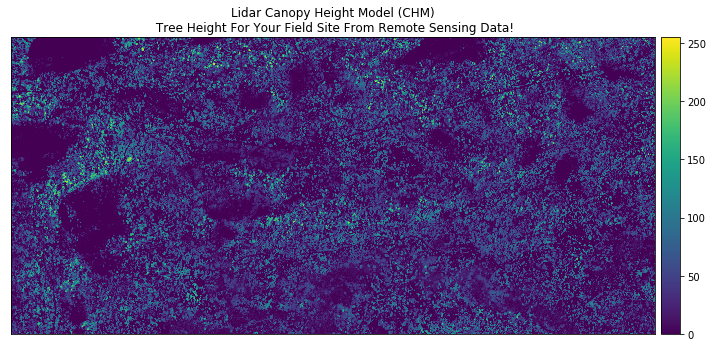

In [14]:
lidar_chm = lidar_dsm_im - lidar_dem_im

ep.plot_bands(lidar_chm,
              cmap='viridis',
              title="Lidar Canopy Height Model (CHM)\n Tree Height For Your Field Site From Remote Sensing Data!")
plt.show()

In [15]:
print('CHM minimum value: ', lidar_chm.min())
print('CHM max value: ', lidar_chm.max())


CHM minimum value:  0.0
CHM max value:  68.119995


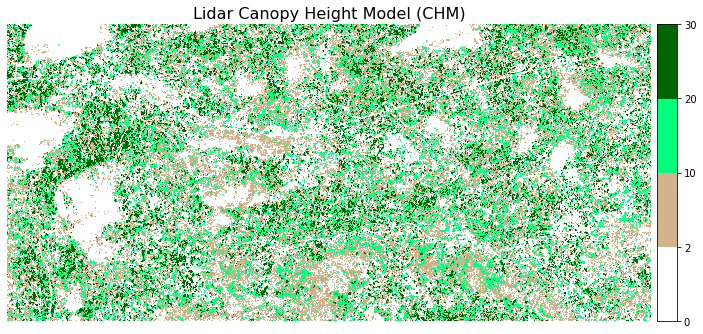

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

# Define the colors you want
cmap = ListedColormap(["white", "tan", "springgreen", "darkgreen"])

# Define a normalization from values -> colors
norm = colors.BoundaryNorm([0, 2, 10, 20, 30], 5)

fig, ax = plt.subplots(figsize=(12, 8))
chm_plot = ax.imshow(lidar_chm, 
                     cmap=cmap, 
                     norm=norm)
ax.set_title("Lidar Canopy Height Model (CHM)", fontsize=16)
ep.colorbar(chm_plot)
ax.set_axis_off()
plt.show()


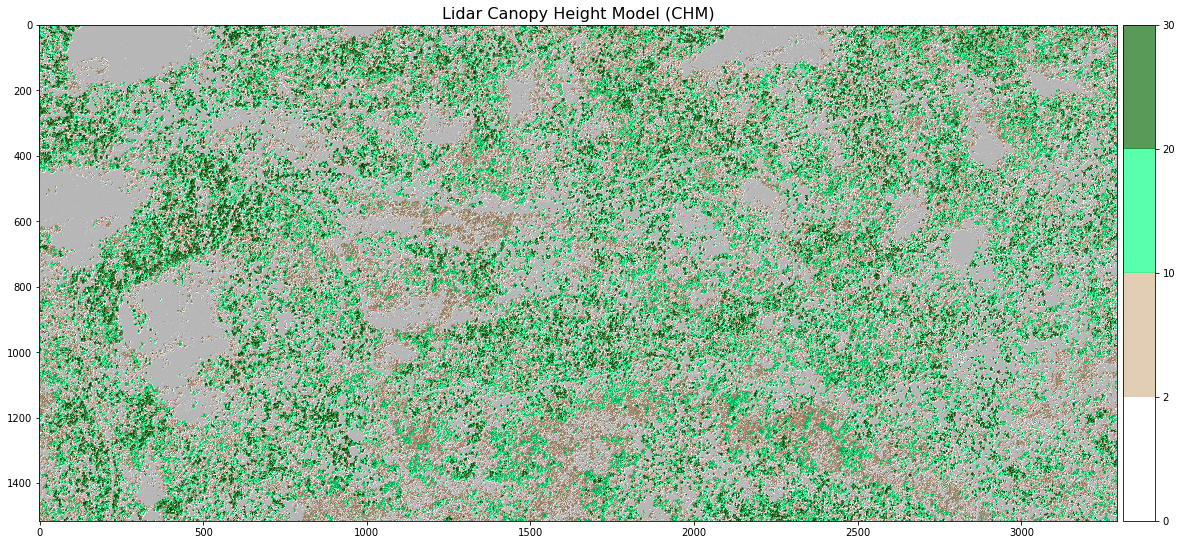

In [20]:
# create hillshade using hillshade function in earthpy
chm_hill = es.hillshade(lidar_chm, 315, 45)

# plot the data
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(chm_hill, cmap='Greys')
chm_plot = ax.imshow(lidar_chm, 
                     cmap=cmap, 
                     norm=norm, alpha = .65)

ep.colorbar(chm_plot)
ax.set_title("Lidar Canopy Height Model (CHM)", fontsize=16);



In [22]:
if os.path.exists('/home/marta/PycharmProjects/Earth analytics/california/outputs'):
    print('The directory exists!')
else:
    os.makedirs('/home/marta/PycharmProjects/Earth analytics/california/outputs')

# export chm as a new geotiff to use or share with colleagues
with rio.open('/home/marta/PycharmProjects/Earth analytics/california/outputs/lidar_chm.tiff', 'w', **dsm_meta) as ff:
    ff.write(lidar_chm,1)


The directory exists!


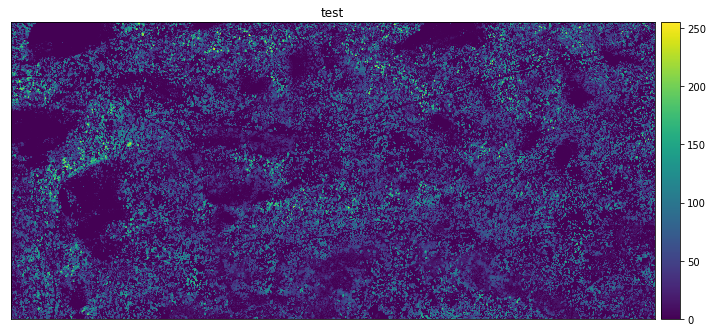

In [26]:
test = "/home/marta/PycharmProjects/Earth analytics/california/outputs/lidar_chm.tiff"

with rio.open(test) as src:
    test = src.read(1, masked=True)

ep.plot_bands(test,
              cmap='viridis',
              title="test")
plt.show()

In [27]:
test

masked_array(
  data=[[0.0, 0.0, 0.0, ..., 18.30999755859375, 18.03997802734375,
         18.53997802734375],
        [0.0, 0.050048828125, 0.0299072265625, ..., 4.0999755859375,
         16.72003173828125, 20.6199951171875],
        [19.510009765625, 2.4200439453125, 2.9100341796875, ...,
         11.53997802734375, 13.82000732421875, 12.8699951171875],
        ...,
        [3.9200439453125, 6.8699951171875, 9.8699951171875, ..., 0.0,
         3.550048828125, 4.659912109375],
        [3.2301025390625, 4.77001953125, 8.7000732421875, ...,
         5.1300048828125, 2.3399658203125, 0.0],
        [4.449951171875, 5.2099609375, 6.1099853515625, ...,
         14.6500244140625, 11.3699951171875, 3.6099853515625]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False

In [34]:
with rio.open("/home/marta/PycharmProjects/Earth analytics/california/outputs/lidar_chm.tiff") as src:
    print(src.crs, 'res=', src.res)

EPSG:32611 res= (1.0, 1.0)


In [33]:
with rio.open("/home/marta/PycharmProjects/Earth analytics/california/california/neon-soap-site/2013/lidar/SOAP_lidarDSM.tif") as src:
    print(src.crs, 'res=', src.res)

EPSG:32611 res= (1.0, 1.0)


In [55]:
sjer_dsm = "/home/marta/PycharmProjects/Earth analytics/california/california/neon-sjer-site/2013/lidar/SJER_lidarDSM.tif"

with rio.open(sjer_dsm) as src:
    lidar_dsmim = src.read(1, masked=True)
    sjer_ext = rio.plot.plotting_extent(src)
    
sjer_dtm = "/home/marta/PycharmProjects/Earth analytics/california/california/neon-sjer-site/2013/lidar/SJER_lidarDTM.tif"

with rio.open(sjer_dtm) as src:
    lidar_demim = src.read(1, masked=True)
    dsm_meta = src.profile

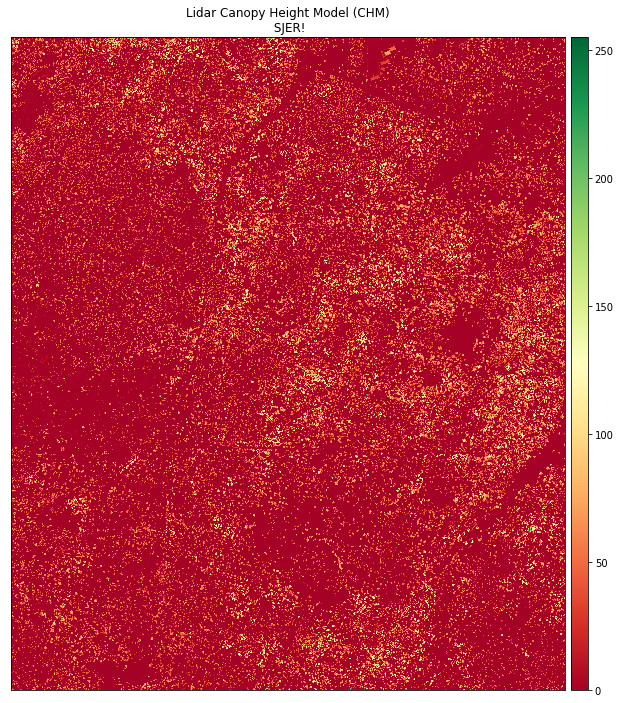

In [61]:
lidar_sjer = lidar_dsmim - lidar_demim

ep.plot_bands(lidar_sjer,
              cmap="RdYlGn",
              title="Lidar Canopy Height Model (CHM)\n SJER!")
plt.show()

In [41]:
print('CHM minimum value: ', lidar_dsmim.min())
print('CHM max value: ', lidar_dsmim.max())

CHM minimum value:  229.56999
CHM max value:  540.99


In [42]:
print('CHM minimum value: ', lidar_demim.min())
print('CHM max value: ', lidar_demim.max())

CHM minimum value:  229.56999
CHM max value:  540.99


In [57]:
print('CHM minimum value: ', lidar_sjer.min())
print('CHM max value: ', lidar_sjer.max())

CHM minimum value:  0.0
CHM max value:  34.119995


In [131]:
import seaborn as sns
sns.set(font_scale=1.5, style="white")
import geopandas as gpd


In [76]:
lidar_dem = rio.open(
    '/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')
lidar_dem.bounds

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)

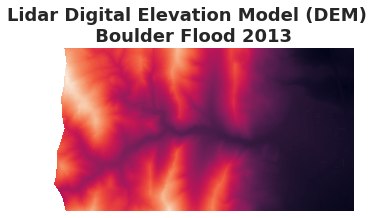

In [77]:
fig, ax = plt.subplots(figsize = (8,3))
show(lidar_dem, 
     title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013", 
     ax=ax)
ax.set_axis_off()



In [78]:
lidar_dem.close()
show(lidar_dem)

RasterioIOError: Dataset is closed: /home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif

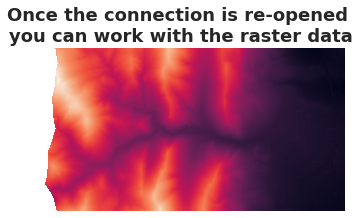

In [79]:
# Open raster data connection - again
lidar_dem = rio.open('/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')

fig, ax = plt.subplots(figsize = (8,3))
show(lidar_dem, 
     title="Once the connection is re-opened \nyou can work with the raster data", 
     ax=ax)
ax.set_axis_off()


In [80]:
with rio.open('/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    print(src.bounds)


BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


In [110]:
with rio.open('/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_hill.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im = src.read()
    # Create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)
    # Get bounds of object
    bounds = src.bounds

# This is the format that matplotlib wants
print("spatial extent:", spatial_extent)
# This is the format that rasterio provides with the bounds attribute
print("rasterio bounds:", bounds)




spatial extent: (472000.0, 476000.0, 4434000.0, 4436000.0)
rasterio bounds: BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


In [107]:
with rio.open('/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_hill.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im2 = src.read(1)
/
with rio.open('/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_hill.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im3 = src.read()

print("Array Shape Using read(1):", lidar_dem_im2.shape)
# Notice that without the (1), your numpy array has a third dimension
print("Array Shape Using read():", lidar_dem_im3.shape)



Array Shape Using read(1): (2000, 4000)
Array Shape Using read(): (1, 2000, 4000)


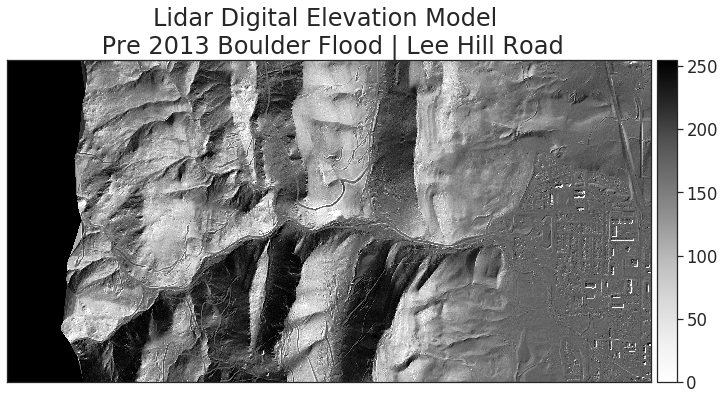

In [111]:
fig, ax = plt.subplots(figsize=(12, 10))
ep.plot_bands(lidar_dem_im,
              cmap='Greys',
              extent=spatial_extent,
              scale=False,
              ax=ax)
ax.set_title("Lidar Digital Elevation Model \n Pre 2013 Boulder Flood | Lee Hill Road", fontsize=24)
plt.show()


In [112]:
lidar_dem_im

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 170, 164, 255],
        [255, 255, 255, ..., 163, 160, 255],
        ...,
        [255, 255, 255, ..., 187, 186, 255],
        [255, 255, 255, ..., 186, 192, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

In [115]:
with rio.open('/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im_7 = src.read()
    # Create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)
    # Get bounds of object
    bounds = src.bounds
lidar_dem_im_7



array([[[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6956300e+03,  1.6954199e+03,  1.6954299e+03],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6956000e+03,  1.6955399e+03,  1.6953600e+03],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6953800e+03,  1.6954399e+03,  1.6953700e+03],
        ...,
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6814500e+03,  1.6813900e+03,  1.6812500e+03],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6817200e+03,  1.6815699e+03,  1.6815599e+03],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6818900e+03,  1.6818099e+03,  1.6817400e+03]]], dtype=float32)

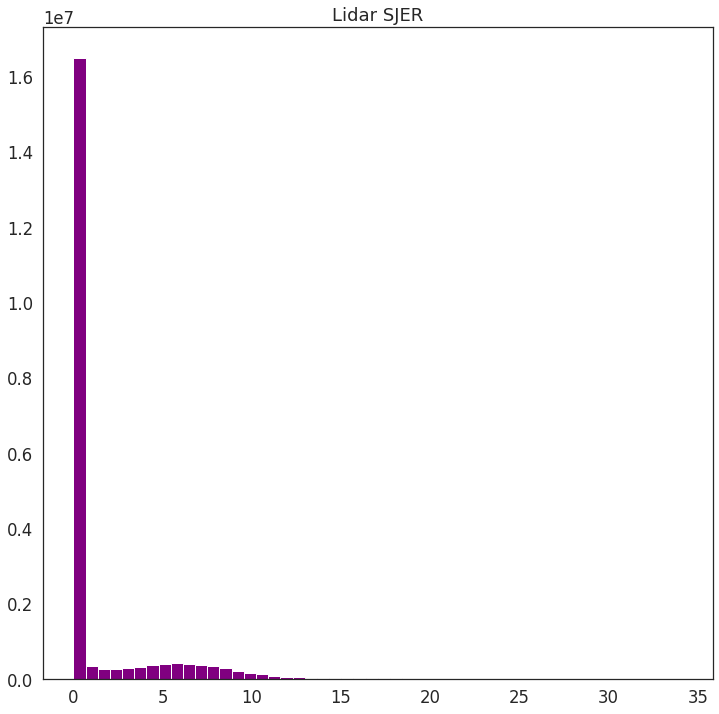

In [123]:
ep.hist(lidar_sjer[~lidar_sjer.mask].ravel(),
        bins=50,
        title="Lidar SJER")
plt.show()


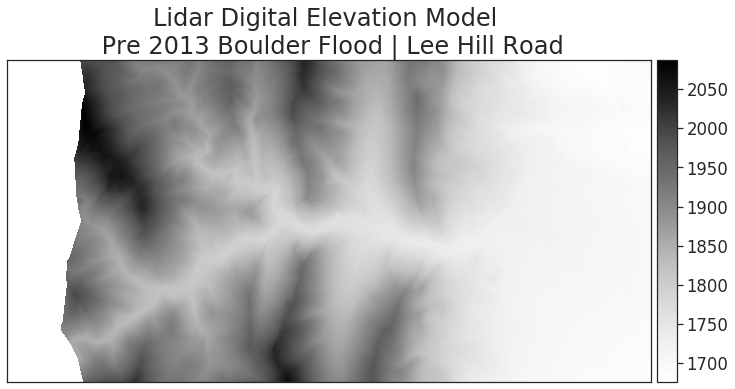

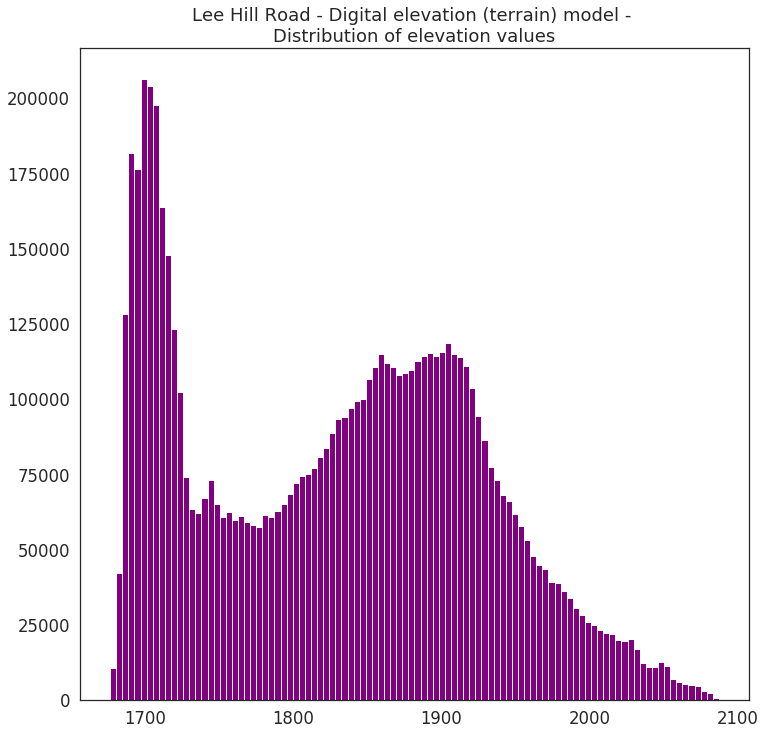

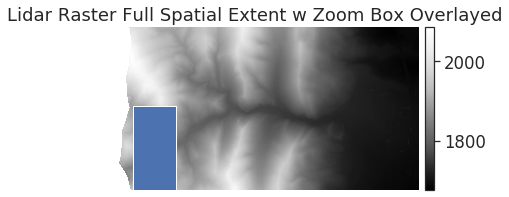

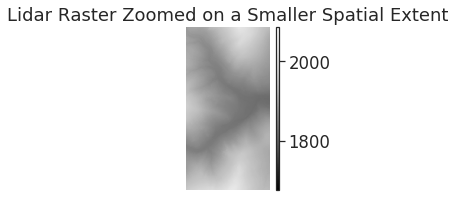

In [136]:
with rio.open('/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    lidar_dem_im = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)

    
#Lidar Digital Elevation Model
fig, ax = plt.subplots(figsize=(12, 10))
ep.plot_bands(lidar_dem_im,
              cmap='Greys',
              extent=spatial_extent,
              scale=False,
              ax=ax)
ax.set_title("Lidar Digital Elevation Model \n Pre 2013 Boulder Flood | Lee Hill Road", fontsize=24)
plt.show()


#Distribution of elevation values
ep.hist(lidar_dem_im[~lidar_dem_im.mask].ravel(),
        bins=100,
        title="Lee Hill Road - Digital elevation (terrain) model - \nDistribution of elevation values")
plt.show()


#Adjust Plot Extent to “Zoom in” on Your Raster Data
zoomed_extent = [472500, 4434000, 473030, 4435030]
# Turn extent into geodataframe
zoom_ext_gdf = gpd.GeoDataFrame()
zoom_ext_gdf.loc[0, 'geometry'] = box(*zoomed_extent)

# Plot the original data with the boundary box
fig, ax = plt.subplots(figsize=(8, 3))
ep.plot_bands(lidar_dem_im,
              extent=spatial_extent,
              title="Lidar Raster Full Spatial Extent w Zoom Box Overlayed",
              ax=ax,
              scale=False)
zoom_ext_gdf.plot(ax=ax)

ax.set_axis_off()


# Plot the data but set the x and y lim
fig, ax = plt.subplots(figsize=(8, 3))
ep.plot_bands(lidar_dem_im,
              extent=spatial_extent,
              title="Lidar Raster Zoomed on a Smaller Spatial Extent",
              ax=ax,
              scale=False)
# Set x and y limits of the plot
ax.set_xlim(zoomed_extent[0], zoomed_extent[2])
ax.set_ylim(zoomed_extent[1], zoomed_extent[3])
ax.set_axis_off()
plt.show()



